In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn')

In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/'
                 'datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


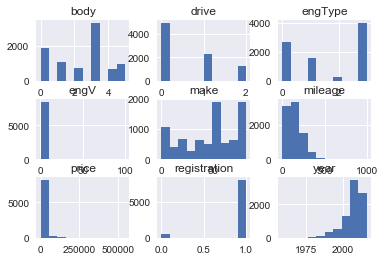

In [3]:
df.hist();

### Handle Outliers

In [4]:
cont_cols = ['mileage', 'price', 'year']

In [5]:
og_shape = df.shape
outliers= len(df[~(np.abs(stats.zscore(df[cont_cols])) < 3).all(axis=1)])
print(round(outliers/og_shape[0]*100, 1), '% outliers', sep='')

3.9% outliers


In [6]:
df = df[(np.abs(stats.zscore(df[cont_cols])) < 3).all(axis=1)]

### Dummify categories

In [7]:
dummified_cols = ['body', 'drive']
for col in dummified_cols:
    df = df.join((pd.get_dummies(df[col], prefix=col)
                    .iloc[:,0:-1]))

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

## 1.2 Split the data into test and train datasets using train_test_split

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

## 1.4 Report the Intercept and Coefficient Values for the fitted model

## 1.5 Use the test data to make predictions

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [8]:
predictors = sorted(list(df.columns.drop(['price', 'make'] + 
                                         dummified_cols)))

target = 'price'

In [9]:
def fit_linear_model(df, target, predictors, test_size=0.2):
    #1.1
    X = df[predictors].values
    y = df[target].values
    
    #1.2
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    
    #1.3
    model = LinearRegression()
    model.fit(X=X_train, y=y_train)
    
    #1.4
    print('coefficients:', dict(zip(predictors, model.coef_)), 
          '\nintercept:', model.intercept_, sep='\n')
    #1.5
    predictions = model.predict(X_test)
    
    #1.6
    rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))
    r2 = r2_score(y_true=y_test, y_pred=predictions)
    print('\nRMSE:', rmse, '\nR2', r2, sep='\n')
    
    return model

In [10]:
model = fit_linear_model(df, target, predictors, test_size=0.2)

coefficients:
{'body_0': 1187.0421200939059, 'body_1': -386.99050033115003, 'body_2': 2347.5696477785027, 'body_3': 1889.146211592402, 'body_4': 154.77664413130367, 'drive_0': -8661.862596994017, 'drive_1': 5581.416507996736, 'engType': -873.2324129867635, 'engV': 74.16696533738539, 'mileage': -26.99952836384398, 'registration': 3743.210376762468, 'year': 807.0701684126744}

intercept:
-1601587.9592881405

RMSE:
9659.12568190581

R2
0.5237217254299347


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

For each 1 year increment, price is expected to increase `$807`.

## 1.8 How should we interpret the Root-Mean-Square Error?

Our average prediction was off by `$9,659`

## 1.9 How should we interpret the $R^2$?

Our model explains `52.4%` of changes in price.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price variable.

In [11]:
df['price_ln'] = np.log(df['price'])

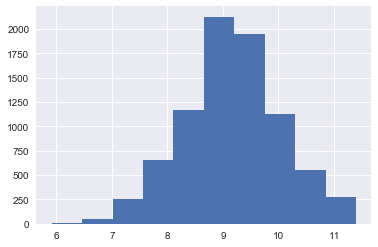

In [12]:
df['price_ln'].hist();

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

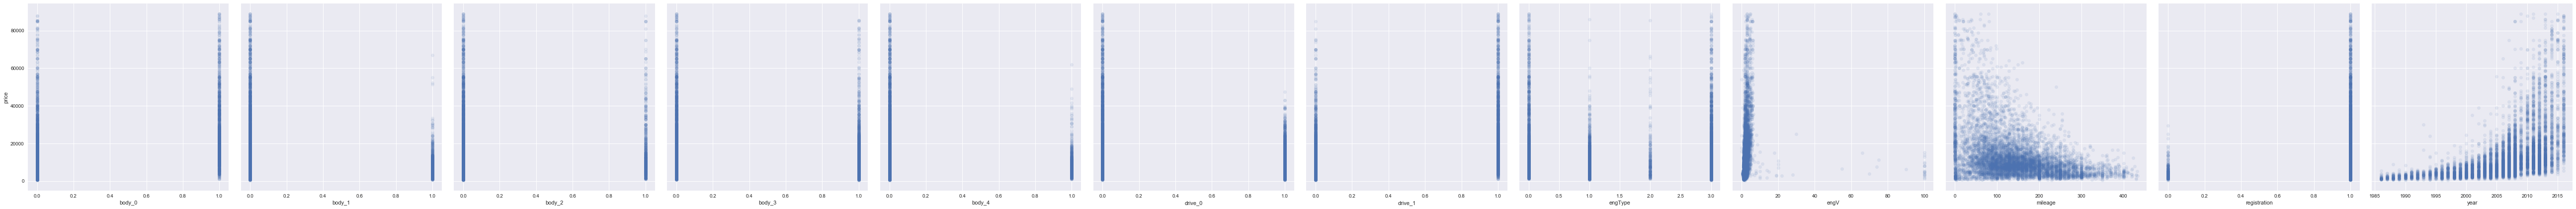

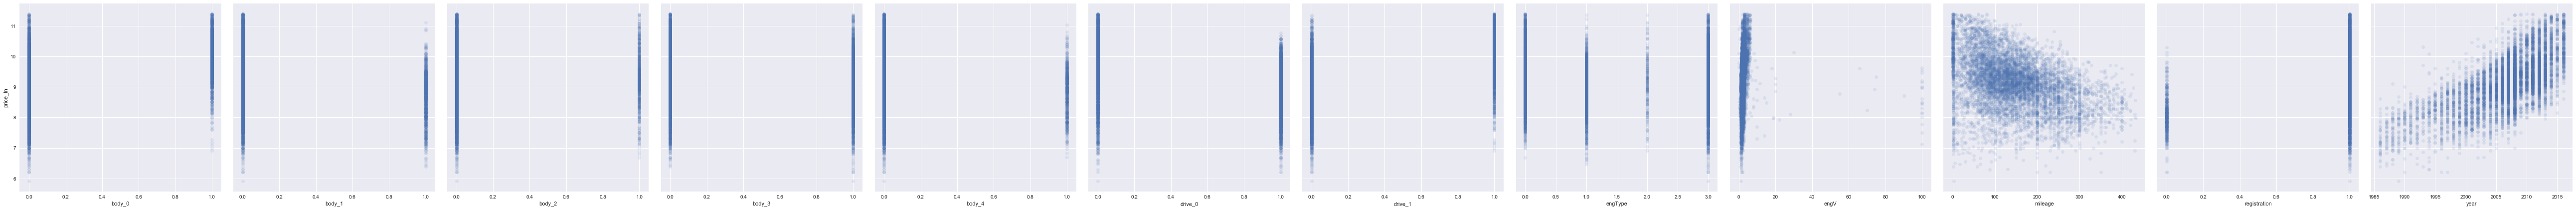

In [13]:
#linear target
sns.pairplot(data=df, y_vars='price', x_vars=predictors, height=6,
             plot_kws={'alpha': 0.1, 'linewidth':0});
#log-linear target
sns.pairplot(data=df, y_vars='price_ln', x_vars=predictors, height=6,
             plot_kws={'alpha': 0.1, 'linewidth':0});

## 2.3 If appropriate, create any polynomial features. 

In [14]:
df['year_poly'] = df['year'] ** (1/4)
df['mileage_poly'] = df['mileage'] ** (2)

In [15]:
predictors = sorted(list(set(predictors + ['year_poly', 'mileage_poly'])))

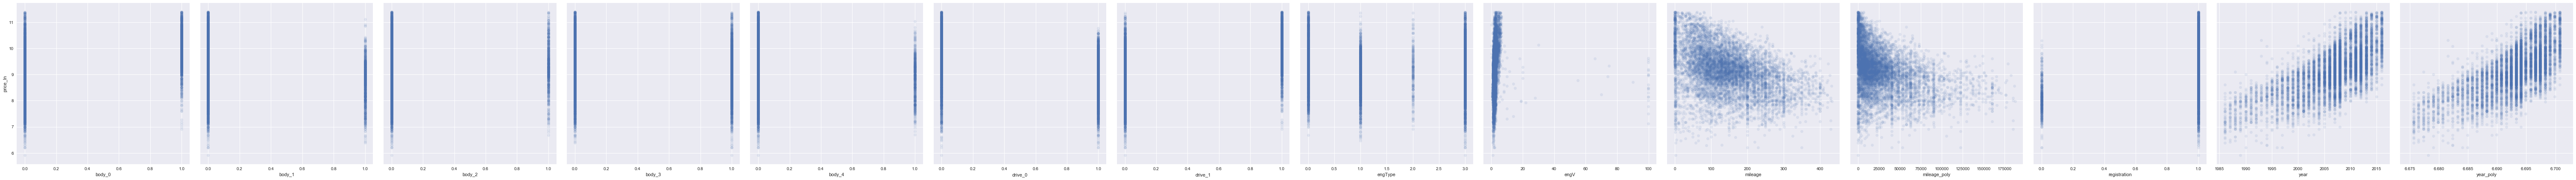

In [16]:
#log-linear target
sns.pairplot(data=df, y_vars='price_ln', x_vars=predictors, height=6,
             plot_kws={'alpha': 0.1, 'linewidth':0});

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [17]:
# Without polynomial terms
predictors = sorted(list(set(predictors) - set(['year_poly', 'mileage_poly'])))
model = fit_linear_model(df, target='price_ln', predictors=predictors, test_size=0.2)

coefficients:
{'body_0': 0.1983237936648421, 'body_1': -0.03959267239534765, 'body_2': 0.19596480338484348, 'body_3': 0.1291823329993166, 'body_4': 0.06251713096435305, 'drive_0': -0.5255622401166409, 'drive_1': 0.21884693455737433, 'engType': -0.029131589730573035, 'engV': 0.004333679558421547, 'mileage': 0.0003933809324236717, 'registration': 0.6614761662979545, 'year': 0.09104211930446673}

intercept:
-174.02764562914865

RMSE:
0.47310730136116447

R2
0.718188451685849


In [18]:
# Including polynomial terms
predictors = sorted(list(set(predictors + ['year_poly', 'mileage_poly'])))
model = fit_linear_model(df, target='price_ln', predictors=predictors, test_size=0.2)

coefficients:
{'body_0': 0.18258625649385152, 'body_1': -0.043837077447153636, 'body_2': 0.19966445110412306, 'body_3': 0.1259804309349812, 'body_4': 0.06342857038460605, 'drive_0': -0.5057263785708866, 'drive_1': 0.24922236399198605, 'engType': -0.022203404627439756, 'engV': 0.004453377143573805, 'mileage': 7.019095426104806e-05, 'mileage_poly': 2.3248770400080554e-06, 'registration': 0.6367647147235785, 'year': 6.996189522264153, 'year_poly': -8266.106480196788}

intercept:
41294.365112125895

RMSE:
0.4650544824307629

R2
0.7277003052786692


Not sure how to interpret `'year_poly': -8266` 

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

For each 1 year increment in year, price increases by `7%`.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

A cost or loss function. In the context of linear regression, the cost function is some error term of the fit of our model.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate of gradient descent is the amount we tweak our model $\theta$ parameters with each iteration.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [19]:
def statsmodel_OLS(df, target, predictors, **fit_args):
    X = df[predictors].copy()
    y = df[target].copy()

    X = sm.add_constant(X)

    model = sm.OLS(endog=y, exog=X).fit(**fit_args)
    
    return model

In [20]:
predictors = sorted(list(set(predictors) - 
                         set(['year_poly', 'mileage_poly'])))
target = 'price_ln'

model = statsmodel_OLS(df, target, predictors, cov_type='HC3')

C:\Users\City_Year\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1665.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        12:59:01   Log-Likelihood:                -5550.4
No. Observations:                8165   AIC:                         1.113e+04
Df Residuals:                    8152   BIC:                         1.122e+04
Df Model:                          12                                         
Covariance Type:                  HC3                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -176.1170      2.578    -68.305      0.000    -181.171    -171.063
body_0           0.2002      0.026      7.674      0.000       0.149       0.251
body_1          -0.0276      0.022     -1.270      0.204      -0.070       0.015
body_2           0.2065      0.027      7.736      0.000       0.154       0.259
body_3           0.1354      0.019      7.307      0.000       0.099       0.172
body_4           0.0449      0.022      2.079      0.038       0.003       0.087
drive_0         -0.5094      0.019    -26.758      0.000      -0.547      -0.472
drive_1          0.2400      0.026      9.184      0.000       0.189       0.291
engType         -0.0286      0.005     -6.283      0.000      -0.037      -0.020
engV             0.0055      0.002      3.085      0.002       0.002       0.009
mileage          0.0004   9.21e-05      4.596      0.000       0.000       0.001
registration     0.6685      0.018     37.495      0.000       0.634       0.703
year             0.0921      0.001     71.922      0.000       0.090       0.095
==============================================================================
Omnibus:                      469.102   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              671.149
Skew:                          -0.512   Prob(JB):                    1.83e-146
Kurtosis:                       3.962   Cond. No.                     8.68e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 8.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [22]:
vif = {col: variance_inflation_factor(df[predictors].values, i) 
       for i, col in enumerate(predictors)}

for i in vif.items():
    print(i)

('body_0', 5.516220226156967)
('body_1', 2.610248648806048)
('body_2', 1.9089839522201213)
('body_3', 5.426197541178984)
('body_4', 1.8026261427291794)
('drive_0', 5.581676862604202)
('drive_1', 5.139592827084372)
('engType', 3.3405274663758413)
('engV', 1.2505420166340635)
('mileage', 4.375198785420905)
('registration', 18.554582490060643)
('year', 44.20237676320898)


Yes `year` and `registration` show evidence of collinearity  (VIF > 10). The polynomial terms I tested were multicollinear  as well. 

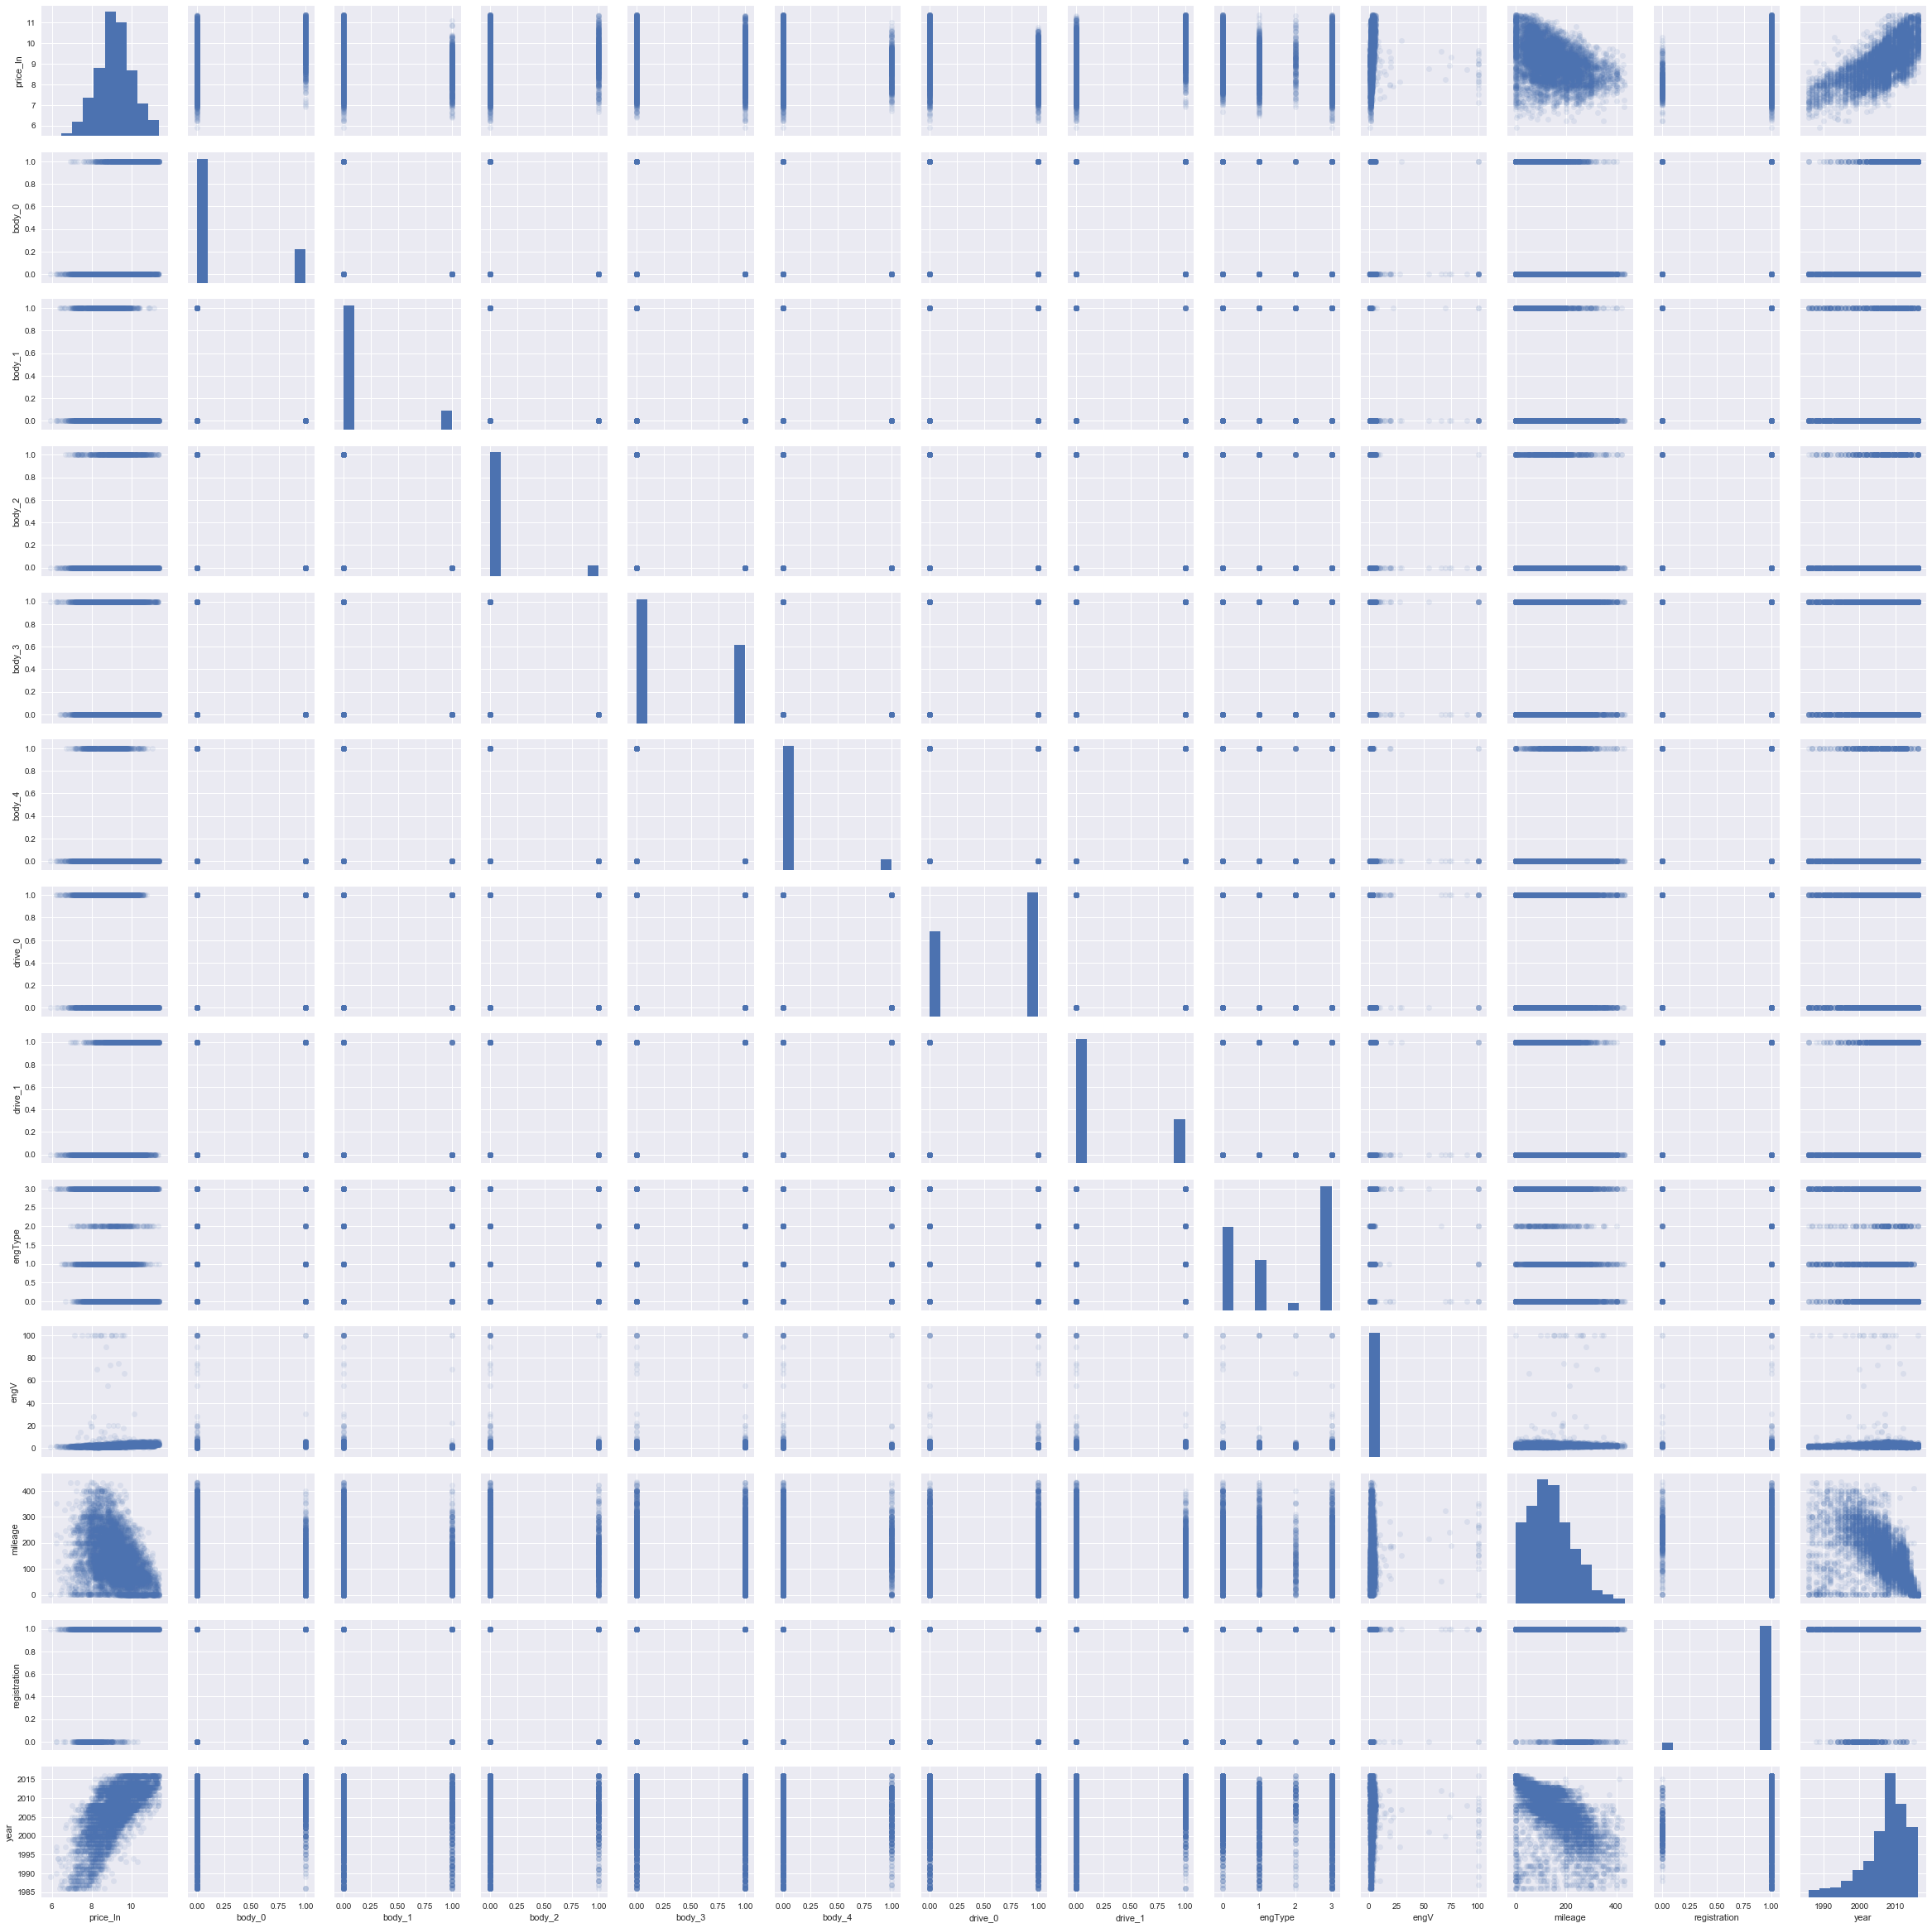

In [23]:
sns.pairplot(df[[target] + predictors], 
             plot_kws={'alpha': 0.1, 'linewidth':0});

C:\Users\City_Year\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
C:\Users\City_Year\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\City_Year\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


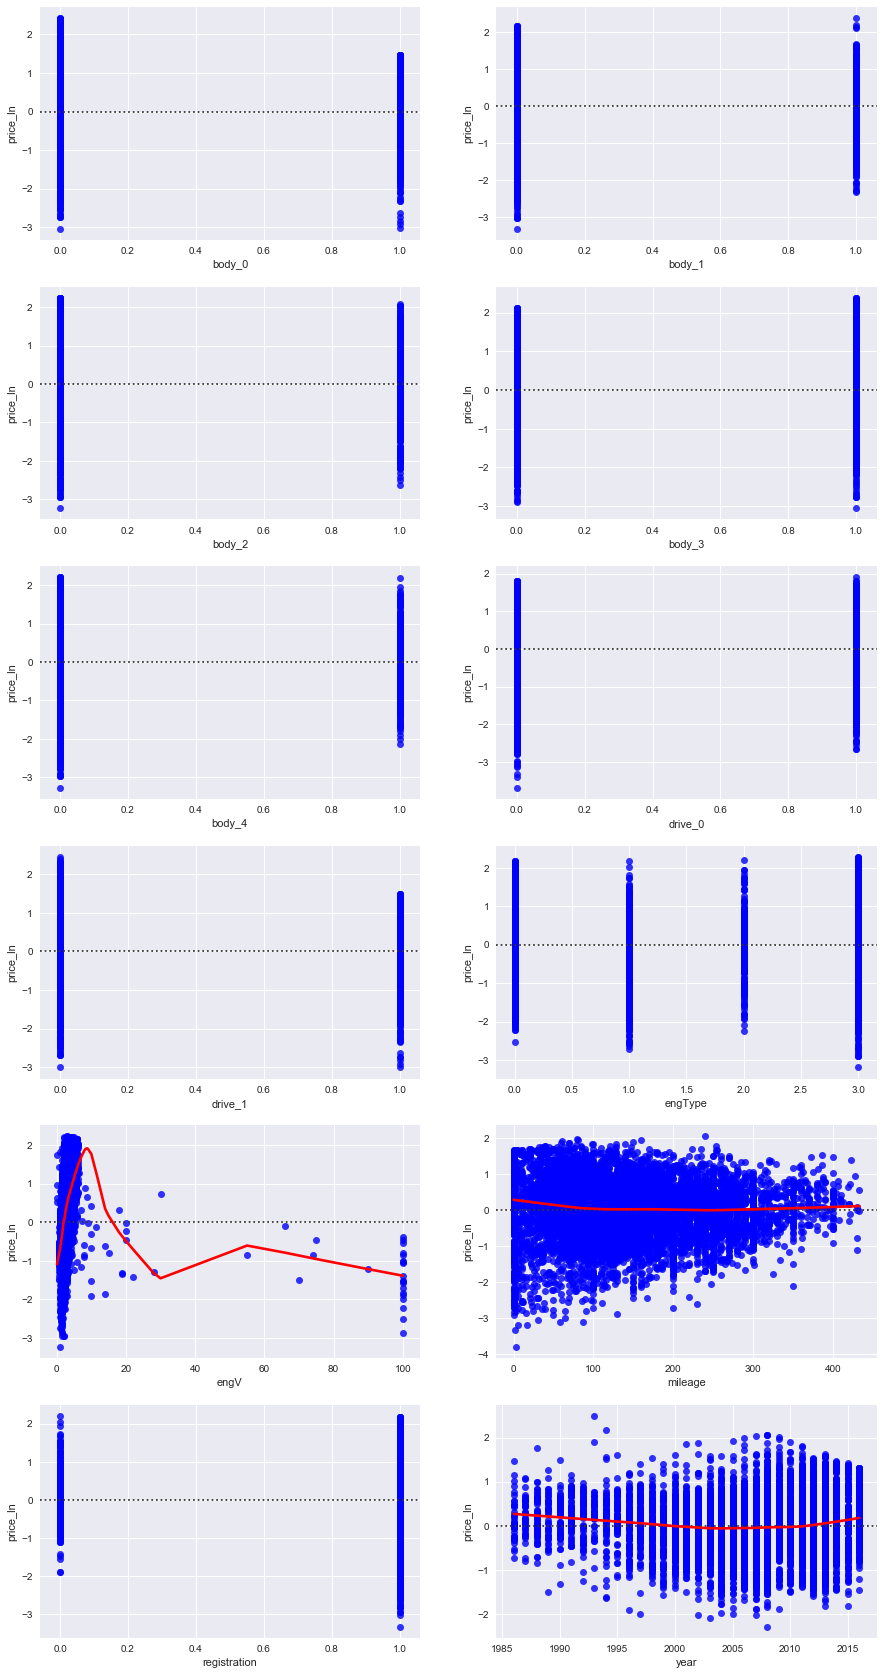

In [24]:
def ceil(a, b=1):
     return int(-(-a // b))

fig, axs = plt.subplots(ncols=2, 
                        nrows=ceil(len(predictors), 2),
                        figsize=(15,30))

for i, col in enumerate(predictors):
    row_i = i // 2
    col_i = i % 2
    ax = axs[row_i][col_i]
    sns.residplot(df[col], df[target], lowess=True, color="r", 
                  ax=ax, scatter_kws={'color':'blue'})

`engV` errors are not homoskedastic!

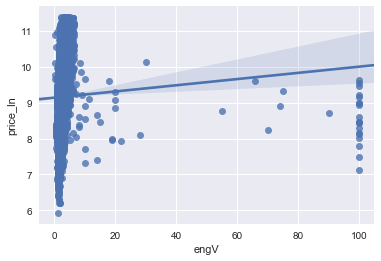

In [25]:
sns.regplot(y=df[target], x=df['engV']);

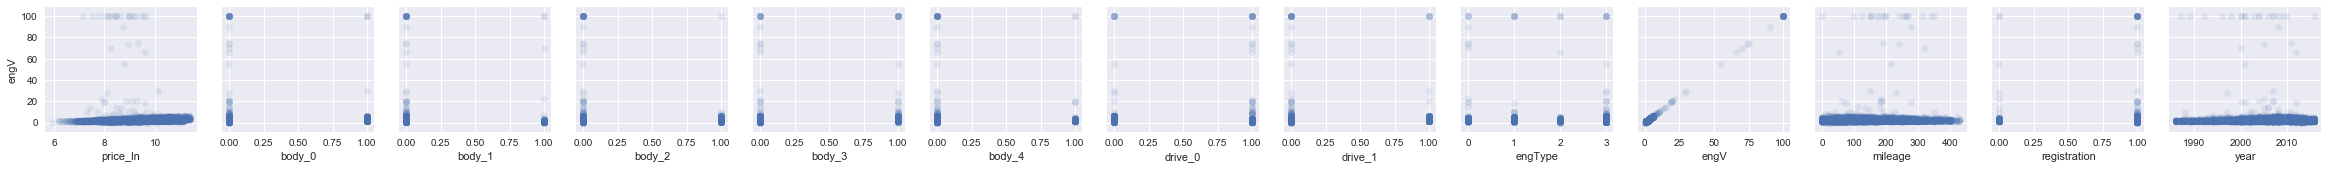

In [26]:
sns.pairplot(data=df, y_vars='engV', x_vars=[target]+predictors,
             plot_kws={'alpha': 0.1, 'linewidth':0});